In [32]:
# Būtini pradiniai nustatymai:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

from datetime import datetime

# from manoFunkcijos import pout
def pout(a, limit=5):
    if len(a) > limit:
        print(f'Rodoma {limit} eilutės iš {len(a)}')
    for k,i in enumerate(a):
        if k > limit-1:
            break
        l = []
        for n in i:
            f = f'{str(n):^16.16}'
            l.append(f)
        t = f'|{k:^3}|'+'|'.join(l)+'|'
        print(t)

#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

print('Pasirengta.',datetime.now())

| 0 |       F        |6,6,6,13.33,10,6|
| 1 |       M        |6,11.33,6,6,6.67|


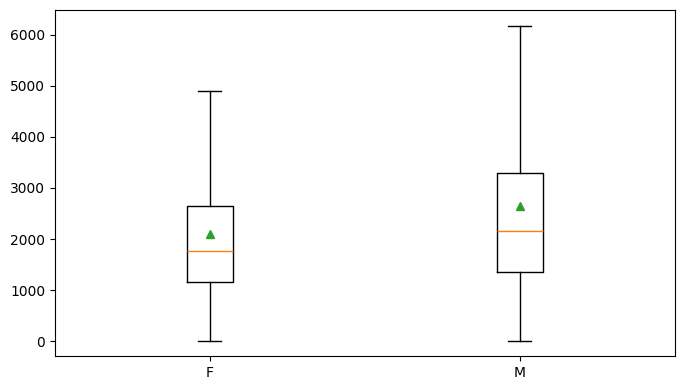

In [28]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""SELECT
lytis, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2014N 
GROUP BY lytis;"""
C.execute(sql)
ans = C.fetchall()
lytis, bdusp = list(map(list, zip(*ans)))
pout(ans)

#  numpy fromstring
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
# print(bduspII)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(bduspII, showmeans=True, showfliers=False)
axis.set_xticklabels(lytis)
plt.show()

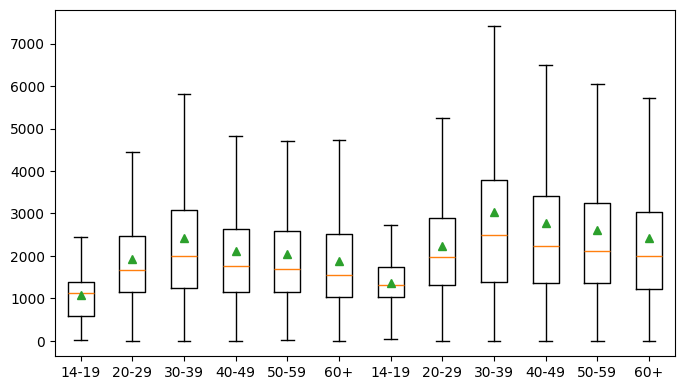

In [19]:
# 1) Parodykite su boxplot atlyginimų pasiskirstymus nuo amžiaus grupės 
# 2018 metams (vyrams ir moterims atskirai).

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
SELECT lytis, amzius, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2014N 
GROUP BY lytis, amzius;
"""
C.execute(sql)
ans = C.fetchall()
lytis, amzius, bdusp = list(map(list, zip(*ans)))
# pout(ans)

#  numpy fromstring
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
# print(bduspII)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(bduspII, showmeans=True, showfliers=False)
axis.set_xticklabels(amzius) # Sulieti 'lytis' ir 'amzius'. (Žr. dėstytojo paskaitos failą.)
plt.show()

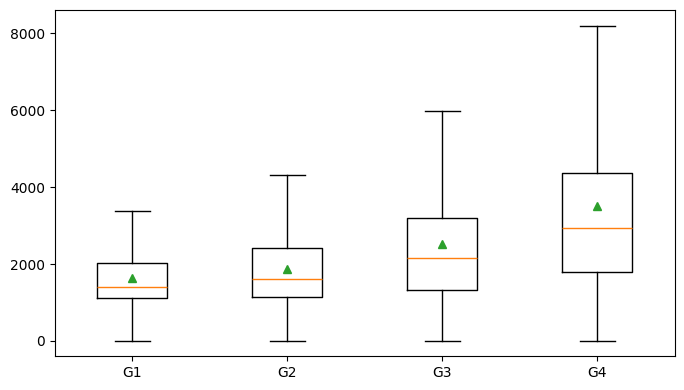

In [16]:
# 2) Taip pat parodykite su boxplot'ais atlyginimų pasiskirstymus nuo išsilavinimo, 
# 2018 metams (visiems respondentams).

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
SELECT issilavinimas, GROUP_CONCAT(bdu_spalio) AS GC
FROM DUS2014N 
GROUP BY issilavinimas;
"""
C.execute(sql)
ans = C.fetchall()
issilavinimas, bdusp = list(map(list, zip(*ans)))
# pout(ans)

#  numpy fromstring
bduspII = []
for i in bdusp:
    skaiciai = np.fromstring(i, sep=',')
    bduspII.append(skaiciai)
# print(bduspII)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(bduspII, showmeans=True, showfliers=False)
axis.set_xticklabels(issilavinimas)
plt.show()

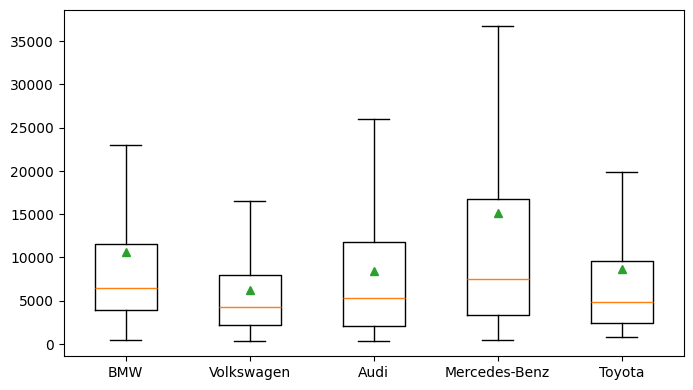

In [9]:
# 3) Pateikite su boxplot'u 
# Autoplius skelbimų kainų pasiskirtymą top 5 automobilių gamintojams.

sql="""
SELECT gamintojas, count(*) n, GROUP_CONCAT(cast(replace(price,' ','') as float)) kainos
FROM works.autopliuslt 
GROUP BY gamintojas
order by n desc limit 5;
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, n, kainos = list(map(list, zip(*ans)))
# pout(ans)

#  numpy fromstring
kainosNP = [] # kainos numpy dvimačiame masyve
for i in kainos:
    skaiciai = np.fromstring(i, sep=',')
    kainosNP.append(skaiciai)
# print(kainosNP)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(kainosNP, showmeans=True, showfliers=False)
axis.set_xticklabels(gamintojas)
plt.show()

In [24]:
print('Vidutinė kaina visoje lentelėje eliminuojant dublius:')
sql="""
SELECT avg(cast(replace(price,' ','') as float)) vidKaina
FROM (
	SELECT id, price, 
		ROW_NUMBER() OVER (PARTITION BY id) AS rn FROM works.autopliuslt
) as T1
WHERE rn=1;
"""
C.execute(sql)
vidurkis = C.fetchone()[0]
print(vidurkis)

Vidutinė kaina visoje lentelėje eliminuojant dublius:
9319.284228769497


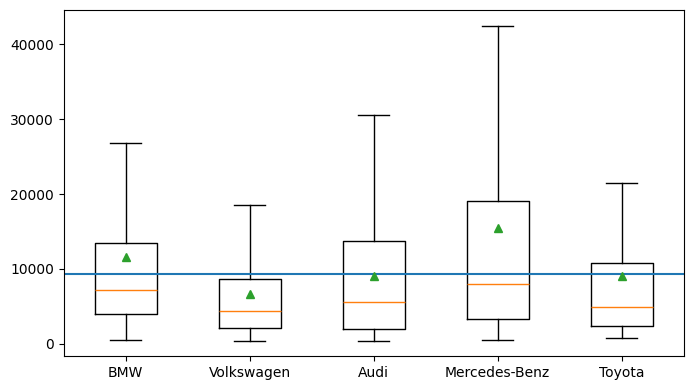

In [26]:
# 3.1) Pateikite su boxplot'u 
# Autoplius skelbimų kainų pasiskirtymą top 5 automobilių gamintojams.
# Eliminuoti besikartojančius ID.
# Suraskite vidutinę kainą visų automobilių ir atvaizduokite brūkšnį ties ta kaina su komanda 
# axis.axhline(y=JŪSŲ RASTAS SKAIČIUS)

# Vidutinė kaina visoje lentelėje eliminuojant dublius:
sql="""
SELECT avg(cast(replace(price,' ','') as float)) vidKaina
FROM (
	SELECT id, price, 
		ROW_NUMBER() OVER (PARTITION BY id) AS rn FROM works.autopliuslt
) as T1
WHERE rn=1;
"""
C.execute(sql)
vidurkis = C.fetchone()[0]

sql="""
SELECT gamintojas, count(*) n, 
	GROUP_CONCAT(cast(replace(price,' ','') as float)) kainos
FROM (
	SELECT gamintojas, modelis, id, price, 
		ROW_NUMBER() OVER (PARTITION BY id) AS rn FROM autopliuslt
) as T1
WHERE rn=1
GROUP BY gamintojas
order by n desc limit 5;
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, n, kainos = list(map(list, zip(*ans)))
# pout(ans)

#  numpy fromstring
kainosNP = [] # kainos numpy dvimačiame masyve
for i in kainos:
    skaiciai = np.fromstring(i, sep=',')
    kainosNP.append(skaiciai)
# print(kainosNP)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(kainosNP, showmeans=True, showfliers=False)
axis.set_xticklabels(gamintojas)
axis.axhline(vidurkis)
plt.show()

In [ ]:
# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių kainą.

sql="""
select * from 
(select gamintojas,	
	round(avg(cast(replace(price,' ','') as float))) gamintojoVidurkis,
	GROUP_CONCAT(cast(replace(price,' ','') as float)) kainos
from autopliuslt
group by gamintojas) as vidurkiai
where gamintojoVidurkis>(SELECT avg(cast(replace(price,' ','') as float)) bendrasisVidurkis
FROM works.autopliuslt);
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kainVidurkis, kainSąrašas = list(map(list, zip(*ans)))
# pout(ans)

# numpy fromstring
kainosNP = [] # kainos numpy dvimačiame masyve
for i in kainSąrašas:
    skaiciai = np.fromstring(i, sep=',')
    kainosNP.append(skaiciai)
# print(kainosNP)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(kainosNP, showmeans=True, showfliers=False)
axis.set_xticklabels(gamintojas)
plt.show()

In [ ]:
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių kainų pasiskirstymą.


sql="""
select * from 
(select gamintojas,	
	round(avg(cast(replace(price,' ','') as float))) gamintojoVidurkis,
	GROUP_CONCAT(cast(replace(price,' ','') as float)) kainos
from autopliuslt
group by gamintojas) as vidurkiai
where gamintojoVidurkis>(SELECT avg(cast(replace(price,' ','') as float)) bendrasisVidurkis
FROM works.autopliuslt);
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, n, kainos = list(map(list, zip(*ans)))
# pout(ans)

#  numpy fromstring
kainosNP = [] # kainos numpy dvimačiame masyve
for i in kainos:
    skaiciai = np.fromstring(i, sep=',')
    kainosNP.append(skaiciai)
# print(kainosNP)

# boxplot:
fig, axis = plt.subplots(figsize=[8,4.5])
axis.boxplot(kainosNP, showmeans=True, showfliers=False)
axis.set_xticklabels(gamintojas)
axis.axhline(vidurkis)
plt.show()